# ANALISIS EXPLORATORIO DE DATOS - MODULO 3
# AUTOR : DAVID MONGRUT
DATASET : [kaggle](https://www.kaggle.com/datasets/narayan63/netflix-popular-movies-dataset)

In [147]:
!pip install kagglehub

In [148]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("narayan63/netflix-popular-movies-dataset")

print("Path to dataset files:", path)
file = '/n_movies.csv'

path_file = path + file

print("Path to dataset files:", path_file)


Path to dataset files: /root/.cache/kagglehub/datasets/narayan63/netflix-popular-movies-dataset/versions/1
Path to dataset files: /root/.cache/kagglehub/datasets/narayan63/netflix-popular-movies-dataset/versions/1/n_movies.csv


# IMPORTACIÓN DE LIBRERIAS

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# APARIENCIA DE GRAFICOS

In [150]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

# CARGA DE DATASET

In [151]:
netflix_df = pd.read_csv(path_file)
netflix_df.head(2)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"


# 1 - VALIDACIÓN DE DATOS Y ANALISIS DE NULOS

## 1.1 TIPOS DE DATOS Y CANTIDAD DE REGISTROS Y VARIABLES

In [152]:
netflix_df.dtypes

,0
title,object
year,object
certificate,object
duration,object
genre,object
rating,float64
description,object
stars,object
votes,object


In [153]:
netflix_df.dtypes.value_counts()

,count
object,8
float64,1


In [154]:
netflix_df.shape

(9957, 9)

## 1.2 ANALISIS DE VALORES NULOS

In [155]:
netflix_df.isnull().any()

,0
title,False
year,True
certificate,True
duration,True
genre,True
rating,True
description,False
stars,False
votes,True


In [156]:
netflix_df.isnull().sum().sort_values(ascending=False)

,0
certificate,3453
duration,2036
rating,1173
votes,1173
year,527
genre,73
title,0
description,0
stars,0


In [157]:
plot_df = netflix_df.isnull().melt(value_name='missing')
plot_df

,variable,missing
0,title,False
1,title,False
2,title,False
3,title,False
4,title,False
...,...,...
89608,votes,False
89609,votes,False
89610,votes,False
89611,votes,False


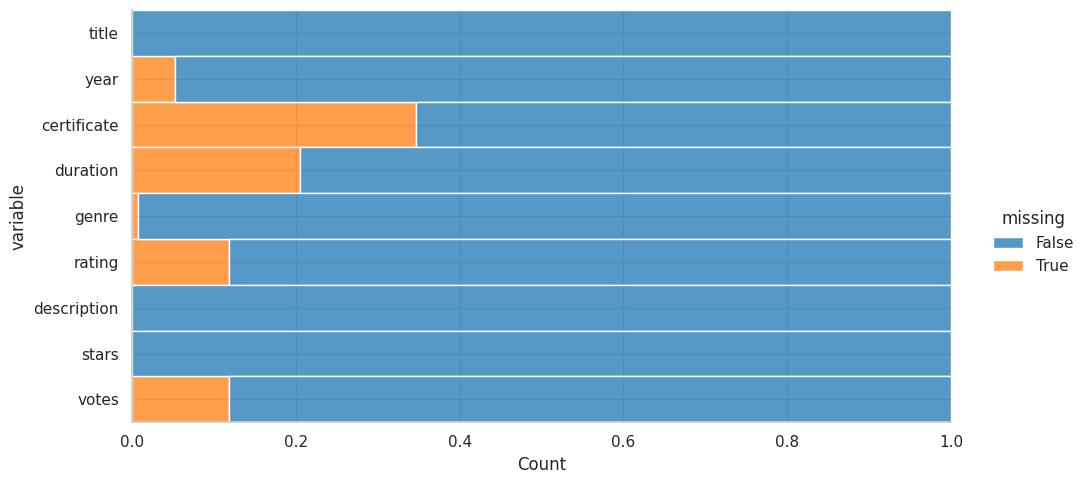

In [158]:
sns.displot(data=plot_df,y='variable',hue='missing',aspect=2,multiple='fill')

<Axes: >

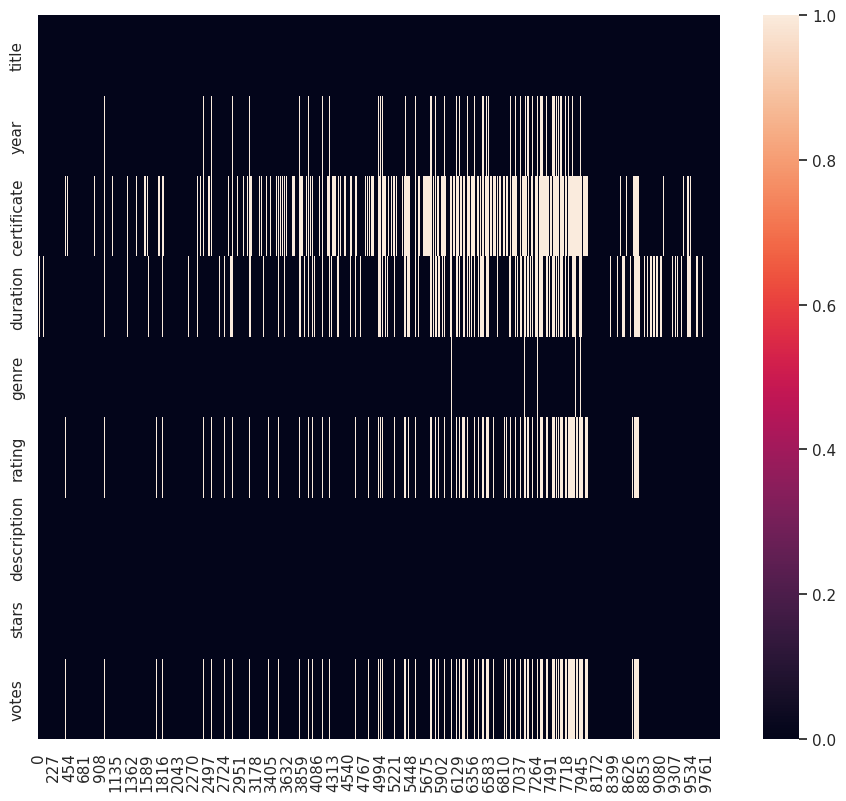

In [159]:
(
    netflix_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

### ¿ CUANTOS VALORES PERDERE SI ELIMINO LOS NULOS?

In [160]:
netflix_df.shape[0]

9957

In [161]:
netflix_df.dropna().shape[0]

5754

In [162]:
int(netflix_df.shape[0]) - int(netflix_df.dropna().shape[0])

4203

### ELIMINAMOS LOS VALORES NULOS

In [163]:
netflix_df.dropna(inplace=True)
netflix_df.isnull().sum().sum()

0

In [164]:
netflix_df.shape

(5754, 9)

# 2 FILTRADO DE DATOS PARA UN MEJOR ANALISIS

In [165]:
netflix_df.head(10)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
5,The Sandman,(2022– ),TV-MA,45 min,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...","116,358"
6,Rick and Morty,(2013– ),TV-MA,23 min,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...","502,160"
7,Breaking Bad,(2008–2013),TV-MA,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,"['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...","1,831,340"
8,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,123"
9,Blonde,(2022),NC-17,166 min,"Biography, Drama, Mystery",6.2,A fictionalized chronicle of the inner life of...,"['Andrew Dominik', '| ', ' Stars:', 'Ana de...",935


In [166]:
netflix_df.dtypes

,0
title,object
year,object
certificate,object
duration,object
genre,object
rating,float64
description,object
stars,object
votes,object


In [167]:
netflix_processed_df = netflix_df.drop(columns=['title','year', 'certificate','description', 'stars', 'genre']).copy()
netflix_processed_df.dtypes

,0
duration,object
rating,float64
votes,object


In [168]:
netflix_processed_df['votes'] = netflix_processed_df['votes'].str.replace(',','').astype('int64')
netflix_processed_df

,duration,rating,votes
0,30 min,8.5,177031
1,58 min,8.7,199885
2,46 min,8.9,501384
3,356 min,5.9,9773
4,24 min,8.6,15413
...,...,...,...
9952,45 min,6.3,3130
9953,44 min,8.1,970067
9954,58 min,8.7,199898
9955,44 min,8.4,439601


In [169]:
netflix_processed_df['duration'] = netflix_processed_df['duration'].str.replace('min','').astype('int64')
netflix_processed_df

,duration,rating,votes
0,30,8.5,177031
1,58,8.7,199885
2,46,8.9,501384
3,356,5.9,9773
4,24,8.6,15413
...,...,...,...
9952,45,6.3,3130
9953,44,8.1,970067
9954,58,8.7,199898
9955,44,8.4,439601


# 3  CORRELACIONES

## 3.1 CORRELACIÓN DE VARIABLES NÚMERICAS

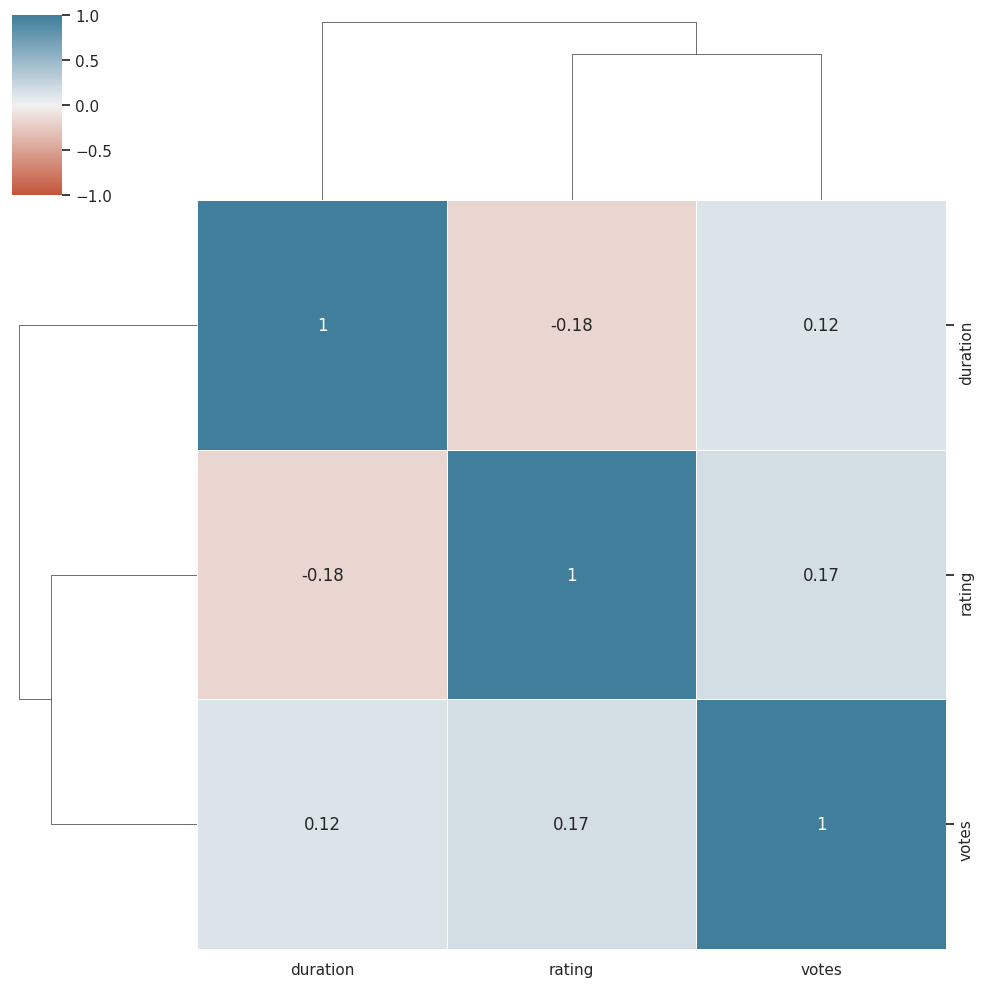

In [170]:
sns.clustermap(
    data=netflix_processed_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)

## 3.2 CORRELACIÓN CON VARIABLES CATEGORICAS

In [171]:
print(netflix_processed_df['duration'].unique())
print(netflix_processed_df['rating'].unique())
print(netflix_processed_df['votes'].unique())

[ 30  58  46 356  24  45  23  49 166  51  89  44 139 118 110  60 178  41
  50  22 326 122 101  43  42 114  55  48 113 201  53  54   7 104 187 179
 147 102 169  47 534 194  88  75  25  15  70  59 127 124 106  97  52  65
 135 572 112 138 155 450 121 117 111 151 129 149  98 108 116  94  40 268
 132 115 128  80  56  99 545 140  96  90 125  11 270 126 494 174 105 208
 298 157 209 156 452 107 123 385 130 119 103  28 134  95 363 100  82 133
 260 109  20  81  84 120  35  93 137  92 148 218 280  91 152 458 370  85
 136 142 375 160  16 296  78 143 331 177  12 150 131 154  87  86 491 386
 362 197 342  83   9  10 368 467  26 557 220 347  67 267 202 264  34  18
 990 312  33 629  63 284  21  74 313 360 144  57  64 167 192 230 460  17
 212 145 162 316 281 240  37 461 403 258  76  79   4  68  31  27  61 333
 306 236  77 216  29 189 542 374 300  32 204 247  39 163 191 183  38 231
 158 291  13 228 227 171 436 200 287 384 203 172 170  62 233  73 205 253
 185 180  36 395  72   3 242 271 288 243 217  71 23

In [172]:
netflix_processed_df = (
    netflix_processed_df
    .assign(
        numeric_duration =lambda df: df.duration.astype('category').cat.codes,
        numeric_rating =lambda df: df.rating.astype('category').cat.codes,
        numeric_votes = lambda df: df.votes.astype('category').cat.codes
    )
)
netflix_processed_df

,duration,rating,votes,numeric_duration,numeric_rating,numeric_votes
0,30,8.5,177031,29,65,4005
1,58,8.7,199885,57,67,4030
2,46,8.9,501384,45,69,4185
3,356,5.9,9773,252,39,2676
4,24,8.6,15413,23,66,2968
...,...,...,...,...,...,...
9952,45,6.3,3130,44,43,1671
9953,44,8.1,970067,43,61,4218
9954,58,8.7,199898,57,67,4031
9955,44,8.4,439601,43,64,4175


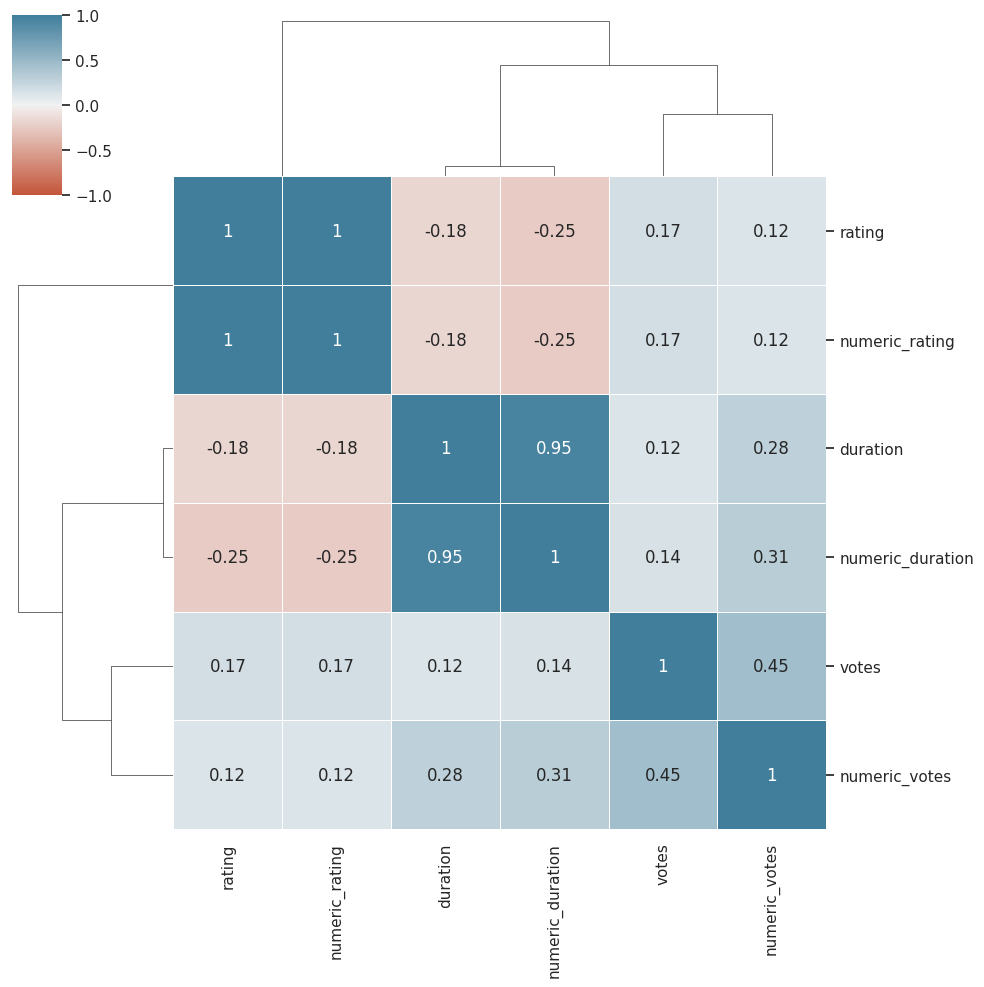

In [173]:
sns.clustermap(
    data=netflix_processed_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)

# 4 MEDIDAS DE TENDENCIA CENTRAL Y DISPERSIÓN

## 4.1 TENDENCIA CENTRAL

In [174]:
netflix_processed_df.isnull().sum().sum()

0

In [175]:
netflix_processed_df.mean(numeric_only=True)

,0
duration,73.843239
rating,6.792822
votes,29134.425269
numeric_duration,71.054223
numeric_rating,47.929788
numeric_votes,1719.091936


In [176]:
netflix_processed_df.median(numeric_only=True)

,0
duration,61.0
rating,6.9
votes,2600.0
numeric_duration,60.0
numeric_rating,49.0
numeric_votes,1518.0


In [177]:
netflix_processed_df.mode(numeric_only=True)

,duration,rating,votes,numeric_duration,numeric_rating,numeric_votes
0,24,7.4,130,23,54,115


## 4.2 DISPERSIÓN

In [178]:
netflix_processed_df.min(numeric_only=True)

,0
duration,1.0
rating,1.7
votes,8.0
numeric_duration,0.0
numeric_rating,0.0
numeric_votes,0.0


In [179]:
netflix_processed_df.max(numeric_only=True)

,0
duration,990.0
rating,9.9
votes,1844075.0
numeric_duration,284.0
numeric_rating,77.0
numeric_votes,4235.0


In [180]:
netflix_processed_df.std(numeric_only=True)

,0
duration,53.508343
rating,1.226242
votes,106940.381521
numeric_duration,43.306998
numeric_rating,12.254257
numeric_votes,1282.506075


In [181]:
(netflix_processed_df
 .quantile(q=[0.25,0.50,0.75],numeric_only=True)
 .transpose()
 .rename_axis('metric')
 .reset_index()
 .assign(iqr = lambda df: df[0.75] - df[0.25])
 )

,metric,0.25,0.5,0.75,iqr
0,duration,40.00,61.0,98.00,58.0
1,rating,6.10,6.9,7.70,1.6
2,votes,617.25,2600.0,11880.25,11263.0
3,numeric_duration,39.00,60.0,97.00,58.0
4,numeric_rating,41.00,49.0,57.00,16.0
5,numeric_votes,528.25,1518.0,2806.75,2278.5


## 4.3 GRAFICA DE MEDIDAS CENTRALES Y DIPSERSIÓN DE LA VARIABLE: rating

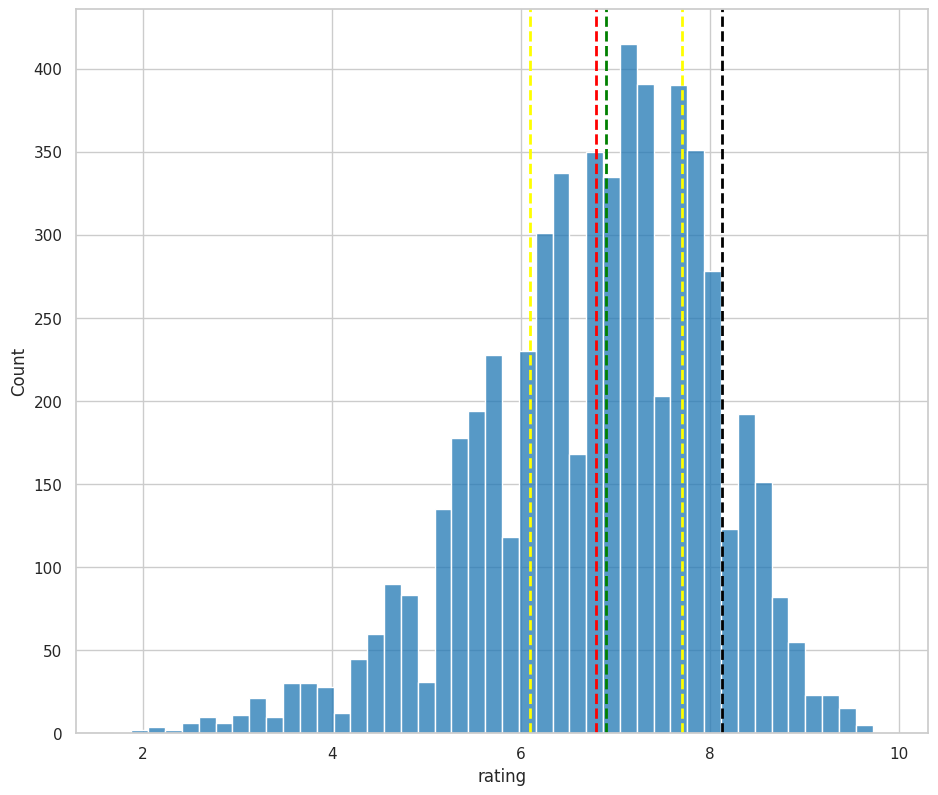

In [182]:
df = netflix_processed_df
variable = 'rating'
sns.histplot(
    data=df,
    x=variable
)
plt.axvline(
    x=df[variable].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median() +df[variable].std(),
    color='black',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

# 5 CONTEOS Y PROPORCIONES

In [183]:
netflix_processed_df.describe()

,duration,rating,votes,numeric_duration,numeric_rating,numeric_votes
count,5754.000000,5754.000000,5.754000e+03,5754.000000,5754.000000,5754.000000
mean,73.843239,6.792822,2.913443e+04,71.054223,47.929788,1719.091936
std,53.508343,1.226242,1.069404e+05,43.306998,12.254257,1282.506075
min,1.000000,1.700000,8.000000e+00,0.000000,0.000000,0.000000
25%,40.000000,6.100000,6.172500e+02,39.000000,41.000000,528.250000
50%,61.000000,6.900000,2.600000e+03,60.000000,49.000000,1518.000000
75%,98.000000,7.700000,1.188025e+04,97.000000,57.000000,2806.750000
max,990.000000,9.900000,1.844075e+06,284.000000,77.000000,4235.000000


In [184]:
netflix_processed_df.describe()

,duration,rating,votes,numeric_duration,numeric_rating,numeric_votes
count,5754.000000,5754.000000,5.754000e+03,5754.000000,5754.000000,5754.000000
mean,73.843239,6.792822,2.913443e+04,71.054223,47.929788,1719.091936
std,53.508343,1.226242,1.069404e+05,43.306998,12.254257,1282.506075
min,1.000000,1.700000,8.000000e+00,0.000000,0.000000,0.000000
25%,40.000000,6.100000,6.172500e+02,39.000000,41.000000,528.250000
50%,61.000000,6.900000,2.600000e+03,60.000000,49.000000,1518.000000
75%,98.000000,7.700000,1.188025e+04,97.000000,57.000000,2806.750000
max,990.000000,9.900000,1.844075e+06,284.000000,77.000000,4235.000000


## 5.1 CONTEO DE: rating

In [185]:
claim_color = {
    'claim':'#ff6602ff',
    'opinion':'#0f7175ff'
}


<Axes: xlabel='rating'>

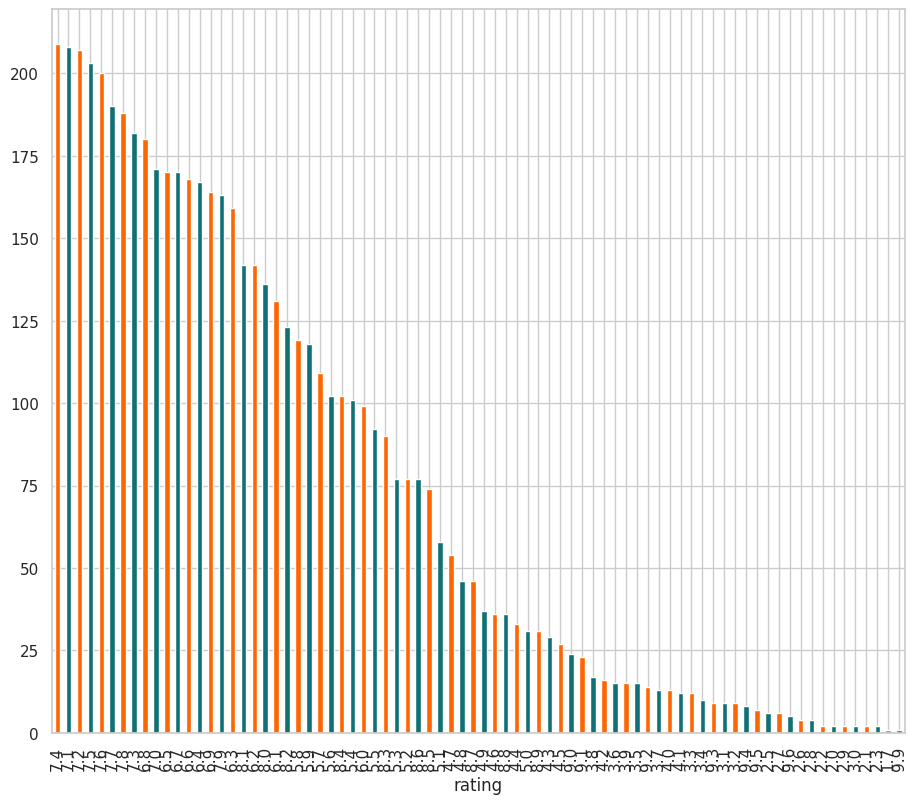

In [189]:
(
    netflix_processed_df
    .rating
    .value_counts()
    .plot(
        kind='bar',
        color=claim_color.values()
    )
)

## 5.2 PROPORCIONES DE: rating

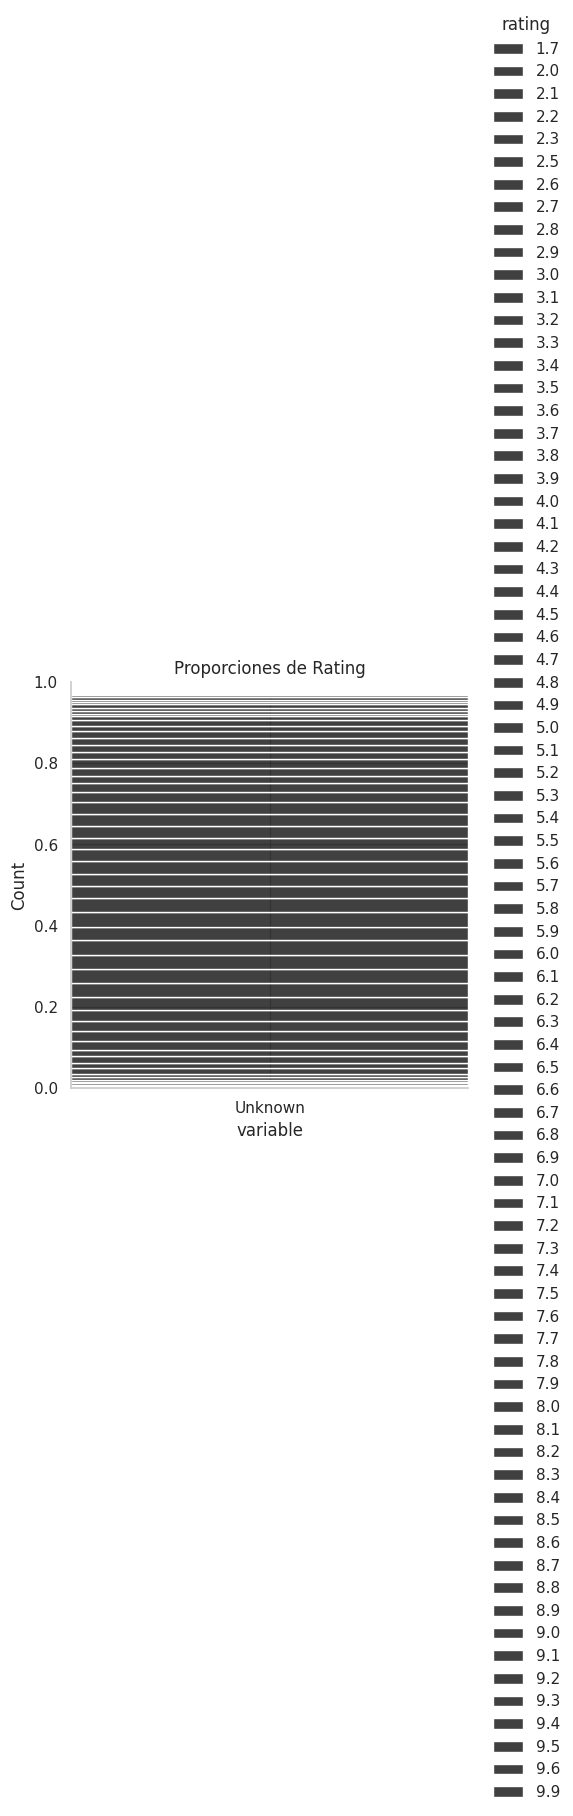

In [199]:

claim_color = {'G': '#ff6602ff', 'PG': '#0f7175ff', 'PG-13': '#008080', 'R': '#FFA500'}
default_color = '#000000'


if 'variable' not in netflix_processed_df.columns:
    netflix_processed_df['variable'] = 'Unknown'


palette = {r: claim_color.get(r, default_color) for r in netflix_processed_df['rating'].dropna().unique()}


sns.displot(data=netflix_processed_df, x='variable', hue='rating', multiple='fill', palette=palette)
plt.title('Proporciones de Rating')
plt.show()



# 6 ANALISIS BIVARIADO

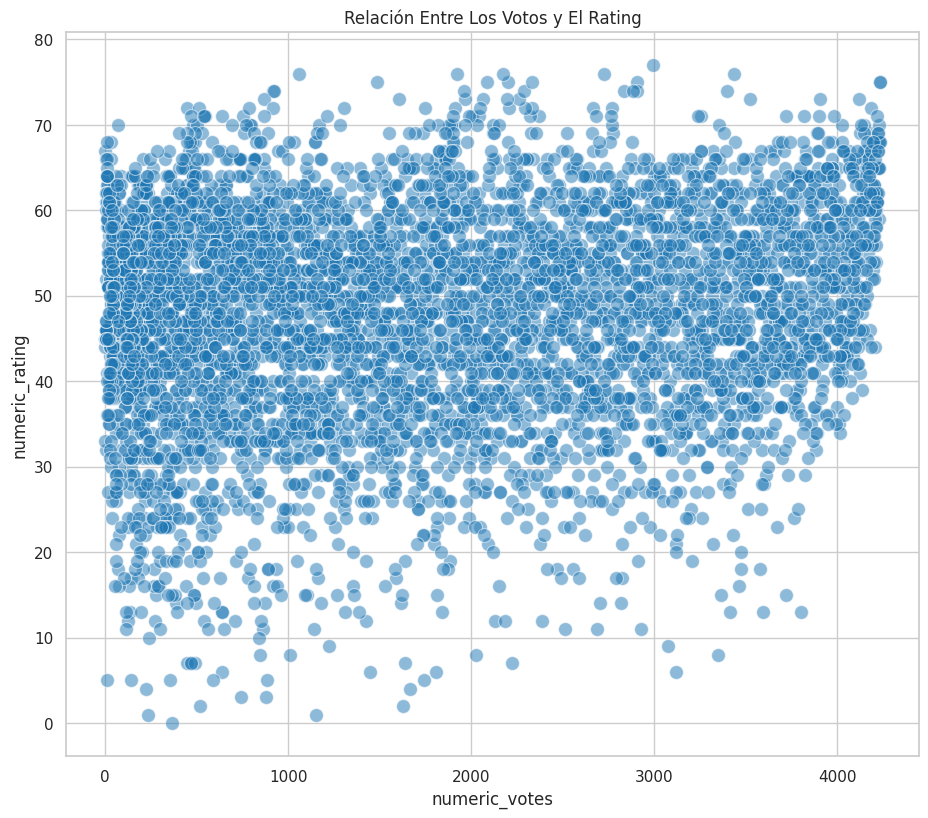

In [200]:
sns.scatterplot(
    data=netflix_processed_df,
    x='numeric_votes',
    y='numeric_rating',
    alpha=1/2,
    s=100
)
plt.title('Relación Entre Los Votos y El Rating')
plt.show()

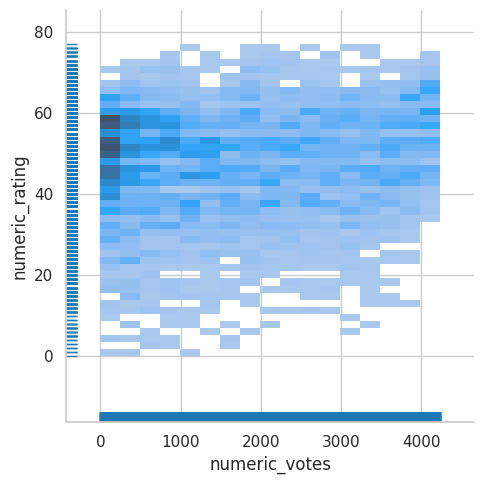

In [201]:
sns.displot(
    data=netflix_processed_df,
    x='numeric_votes',
    y='numeric_rating',
    rug=True
)

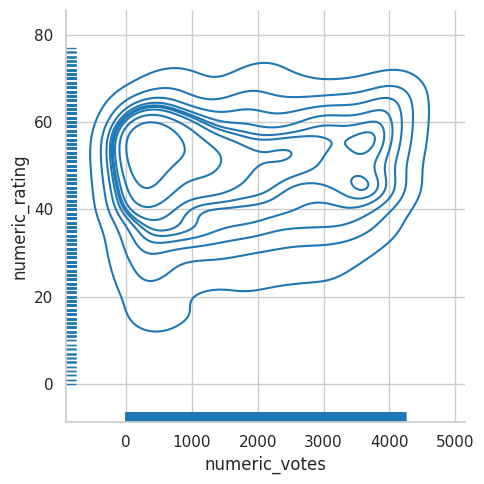

In [202]:
sns.displot(
    data=netflix_processed_df,
    x='numeric_votes',
    y='numeric_rating',
    kind='kde',
    rug=True
)

## 6.1 RELACIÓN ENTRE CATEGORICOS Y NÚMERICOS

<Axes: xlabel='numeric_votes', ylabel='numeric_rating'>

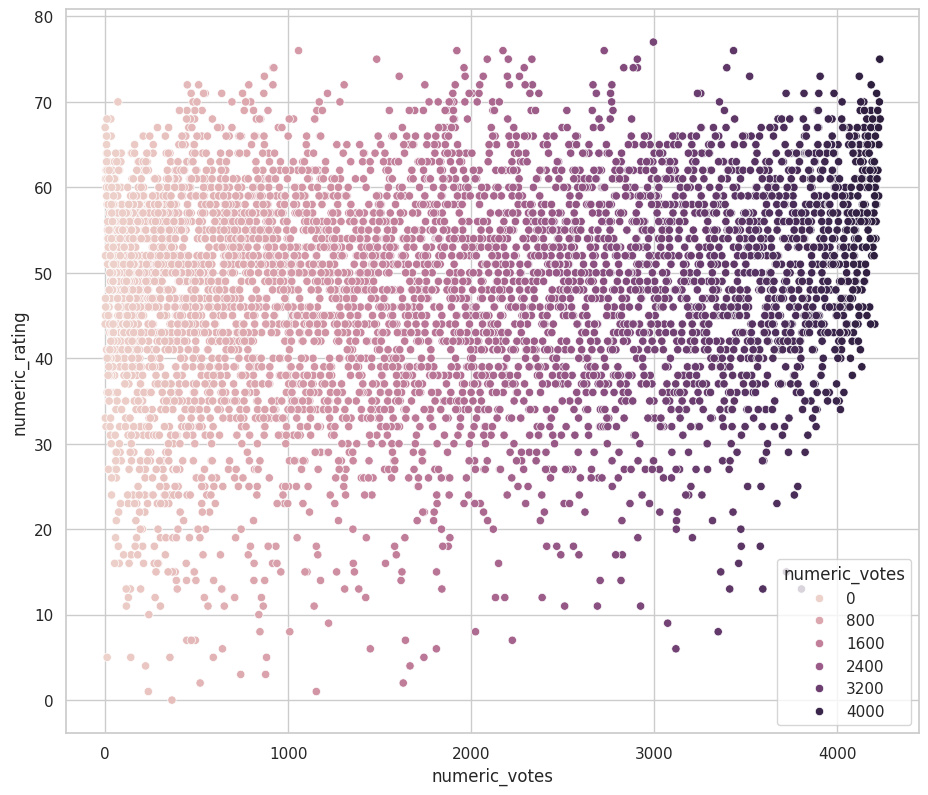

In [203]:
sns.scatterplot(
    data=netflix_processed_df,
    x='numeric_votes',
    y='numeric_rating',
    hue='numeric_votes'
)

<Axes: xlabel='numeric_votes', ylabel='numeric_rating'>

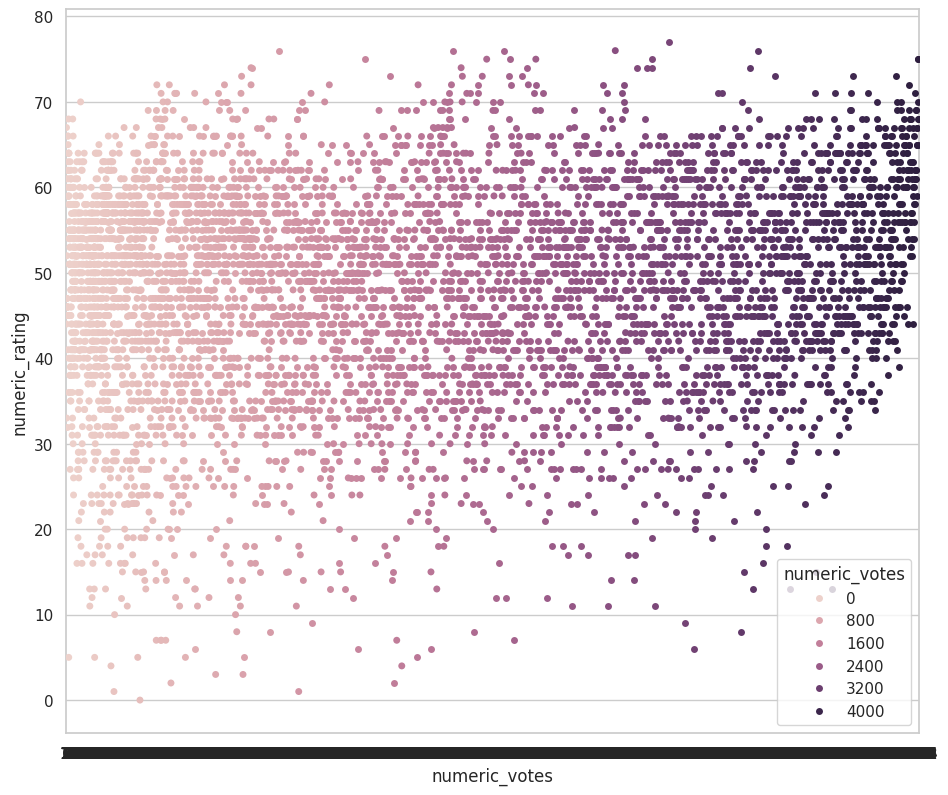

In [204]:
sns.stripplot(
    data=netflix_processed_df,
    x='numeric_votes',
    y='numeric_rating',
    hue='numeric_votes'
)

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1261: RuntimeWarning: invalid value encountered in scalar multiply
  loval = q1 - whis * stats['iqr']
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1262: RuntimeWarning: invalid value encountered in scalar multiply
  hival = q3 + whis * stats['iqr']


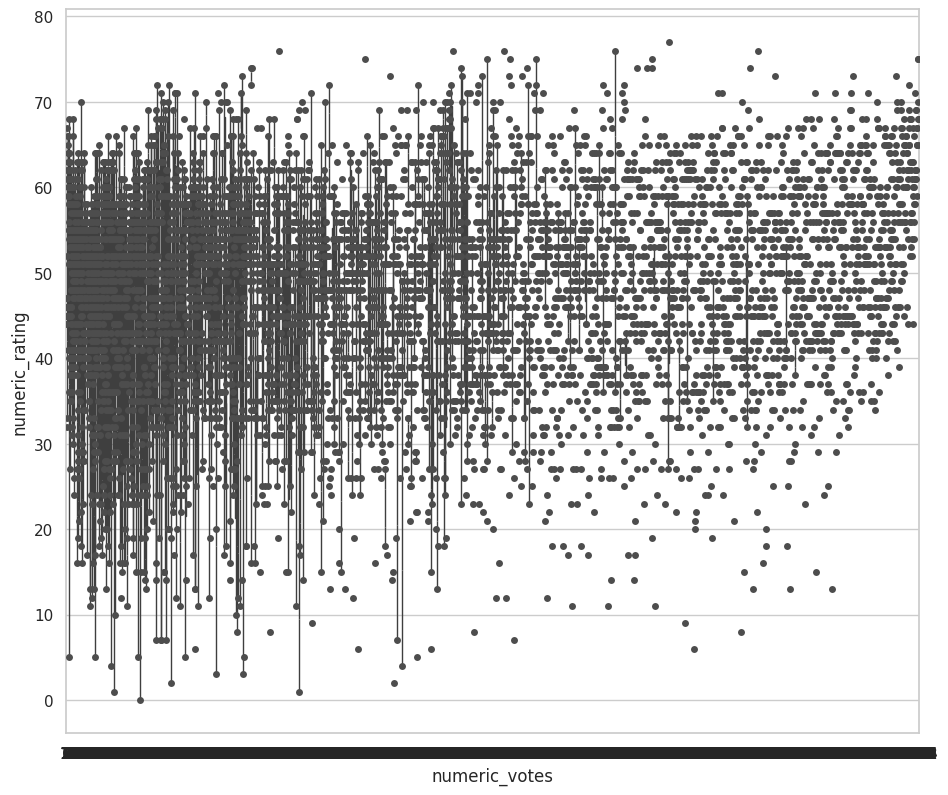

In [205]:
ax = sns.boxplot(
    data=netflix_processed_df,
    x='numeric_votes',
    y='numeric_rating',
    whis=np.inf
)

ax = sns.stripplot(
    data=netflix_processed_df,
    x='numeric_votes',
    y='numeric_rating',
    color='.3'
)